**Logistic Regression Model Evaluation & Naive Bayes Model Evaluation**

**Logistic Regression** is a supervised learning algorithm primarily used for binary classification tasks. Evaluating its performance involves several metrics and techniques to determine how well the model predicts the target variable.

**Naive Bayes** is a probabilistic classifier based on Bayes' theorem with the assumption of feature independence. It is commonly used for text classification tasks.



In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()

# Train the Logistic Regression model
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_confusion = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")
print(f"Confusion Matrix:\n{log_reg_confusion}")

# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_confusion = confusion_matrix(y_test, y_pred_nb)

print("\nNaive Bayes Model Evaluation:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Confusion Matrix:\n{nb_confusion}")

# Optional: Perform Hyperparameter Tuning using GridSearchCV (for Logistic Regression, as an example)
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from grid search
print("\nBest Hyperparameters from GridSearchCV for Logistic Regression:")
print(grid_search.best_params_)

# Evaluate the best Logistic Regression model from GridSearchCV
best_log_reg_model = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg_model.predict(X_test_tfidf)

# Evaluation metrics for the best model
best_log_reg_accuracy = accuracy_score(y_test, y_pred_best_log_reg)
best_log_reg_precision = precision_score(y_test, y_pred_best_log_reg)
best_log_reg_recall = recall_score(y_test, y_pred_best_log_reg)
best_log_reg_f1 = f1_score(y_test, y_pred_best_log_reg)
best_log_reg_confusion = confusion_matrix(y_test, y_pred_best_log_reg)

print("\nBest Logistic Regression Model Evaluation:")
print(f"Accuracy: {best_log_reg_accuracy}")
print(f"Precision: {best_log_reg_precision}")
print(f"Recall: {best_log_reg_recall}")
print(f"F1 Score: {best_log_reg_f1}")
print(f"Confusion Matrix:\n{best_log_reg_confusion}")


Logistic Regression Model Evaluation:
Accuracy: 0.7027027027027027
Precision: 0.6818181818181818
Recall: 0.7894736842105263
F1 Score: 0.7317073170731707
Confusion Matrix:
[[11  7]
 [ 4 15]]

Naive Bayes Model Evaluation:
Accuracy: 0.7567567567567568
Precision: 0.8571428571428571
Recall: 0.631578947368421
F1 Score: 0.7272727272727273
Confusion Matrix:
[[16  2]
 [ 7 12]]

Best Hyperparameters from GridSearchCV for Logistic Regression:
{'C': 10, 'solver': 'liblinear'}

Best Logistic Regression Model Evaluation:
Accuracy: 0.7837837837837838
Precision: 0.7619047619047619
Recall: 0.8421052631578947
F1 Score: 0.8
Confusion Matrix:
[[13  5]
 [ 3 16]]


**Random Forest Model Accuracy**

The accuracy of a Random Forest model is a performance metric that evaluates how well the model's predictions match the true labels in a classification task. It represents the proportion of correctly classified instances out of the total number of instances.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# For train_data (assuming it already has a 'text' and 'label' column)
X_train = train_data['text']
y_train = train_data['label']

# For fake_news_data, we label it as '0' (fake news)
fake_news_data['label'] = 0
X_fake = fake_news_data['text']
y_fake = fake_news_data['label']

# For real_news_data, we label it as '1' (real news)
real_news_data['label'] = 1
X_real = real_news_data['text']
y_real = real_news_data['label']

# Combine fake and real news into a single dataset
X_combined = pd.concat([X_fake, X_real], axis=0)
y_combined = pd.concat([y_fake, y_real], axis=0)

# Shuffle the dataset
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split into train and test data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Random Forest Model Accuracy: {accuracy}")


Random Forest Model Accuracy: 0.8378378378378378


**SVM Model Evaluation**

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification, regression, and outlier detection tasks. SVM works by finding a hyperplane that best separates data points of different classes in a feature space, maximizing the margin between them.

In [ ]:
from sklearn.svm import SVC

# Instantiate SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Confusion Matrix:\n{svm_confusion}")



SVM Model Evaluation:
Accuracy: 0.7567567567567568
Precision: 0.7777777777777778
Recall: 0.7368421052631579
F1 Score: 0.7567567567567568
Confusion Matrix:
[[14  4]
 [ 5 14]]



SVM Model Evaluation:
Accuracy: 0.6756756756756757
Precision: 0.6842105263157895
Recall: 0.6842105263157895
F1 Score: 0.6842105263157895
Confusion Matrix:
[[12  6]
 [ 6 13]]


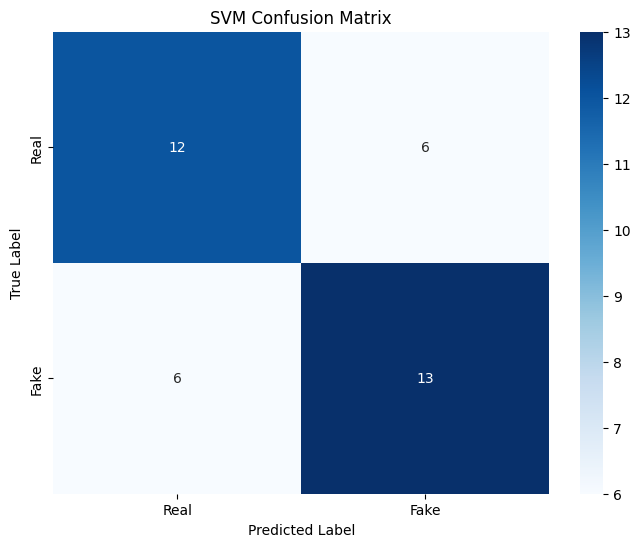

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing for fake and real news datasets
fake_news_data['label'] = 0  # Label fake news as 0
real_news_data['label'] = 1  # Label real news as 1

# Combine fake and real news into a single dataset
X_combined = pd.concat([fake_news_data['text'], real_news_data['text']])
y_combined = pd.concat([fake_news_data['label'], real_news_data['label']])

# Shuffle the data
from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Preprocessing for SVM (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Preprocessing for LSTM (Tokenization and Padding)
max_words = 5000
max_sequence_length = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# --- SVM Model ---
# Instantiate and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Confusion Matrix:\n{svm_confusion}")

# SVM Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



**LSTM Model Evaluation**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to learn and model sequences of data, particularly useful for time series, natural language processing, and other tasks that involve sequential data. LSTM models are capable of learning long-term dependencies by overcoming the vanishing gradient problem faced by traditional RNNs.

Evaluating an LSTM model involves assessing its performance using various metrics depending on the nature of the task, typically classification or regression. These metrics help determine how well the LSTM model can predict or generate sequences.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd



# For train_data (assuming it already has a 'text' and 'label' column)
X_train = train_data['text']
y_train = train_data['label']

# For fake_news_data, we label it as '0' (fake news)
fake_news_data['label'] = 0
X_fake = fake_news_data['text']
y_fake = fake_news_data['label']

# For real_news_data, we label it as '1' (real news)
real_news_data['label'] = 1
X_real = real_news_data['text']
y_real = real_news_data['label']

# Combine fake and real news into a single dataset
X_combined = pd.concat([X_fake, X_real], axis=0)
y_combined = pd.concat([y_fake, y_real], axis=0)

# Optionally, shuffle the dataset
from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split into train and test data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Tokenization and padding sequences for LSTM input
max_words = 5000  # Set max number of words for the tokenizer
max_sequence_length = 300  # Maximum length of padded sequences

# Tokenizer converts text to sequences of word indices
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

# Convert texts to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length for LSTM
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification (fake/real)

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the LSTM model
lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Model Evaluation:\nLoss: {lstm_accuracy[0]}\nAccuracy: {lstm_accuracy[1]}")



Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 704ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.4324 - val_loss: 0.6934
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.5091 - loss: 0.6929 - val_accuracy: 0.4324 - val_loss: 0.6933
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 988ms/step - accuracy: 0.5718 - loss: 0.6925 - val_accuracy: 0.4865 - val_loss: 0.6932
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 948ms/step - accuracy: 0.5154 - loss: 0.6924 - val_accuracy: 0.5135 - val_loss: 0.6931
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 538ms/step - accuracy: 0.5865 - loss: 0.6920 - val_accuracy: 0.5135 - val_loss: 0.6930
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5194 - loss: 0.6930 
LSTM Model Evaluation:
Loss: 0.6929800510406494
Accuracy: 0.5135135054588318


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5032 - loss: 0.6926 - val_accuracy: 0.5135 - val_loss: 0.6933
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - accuracy: 0.5448 - loss: 0.6926 - val_accuracy: 0.5135 - val_loss: 0.6932
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.5523 - loss: 0.6922 - val_accuracy: 0.5135 - val_loss: 0.6930
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.5679 - loss: 0.6921 - val_accuracy: 0.5135 - val_loss: 0.6929
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.5400 - loss: 0.6927 - val_accuracy: 0.5135 - val_loss: 0.6928


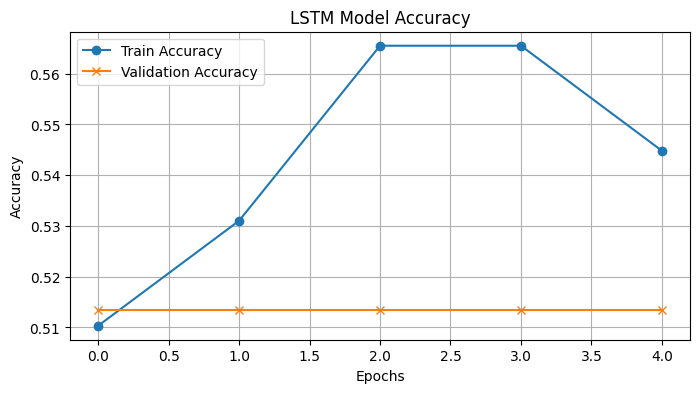

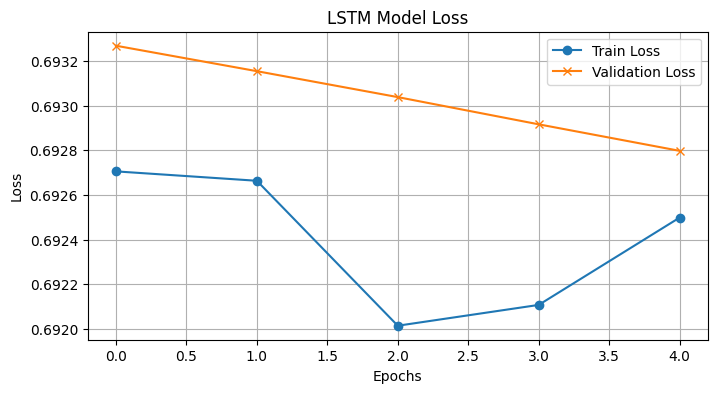

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load and preprocess data (as per your provided code)
# Load datasets

fake_news_data['label'] = 0
real_news_data['label'] = 1
X_combined = pd.concat([fake_news_data['text'], real_news_data['text']], axis=0)
y_combined = pd.concat([fake_news_data['label'], real_news_data['label']], axis=0)

# Shuffle the dataset
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_sequence_length = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define and compile the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

# Train the model and store the history
history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_padded, y_test)
)

# Plot training and validation accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Hyperparameter Tuning**

Hyperparameter tuning (or hyperparameter optimization) refers to the process of selecting the best set of hyperparameters for a machine learning model to maximize its performance. Hyperparameters are external configuration settings that control the training process and structure of a model but are not learned from the data itself. They need to be set before training the model and can significantly impact model performance.

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("\nBest Parameters (GridSearchCV):", grid_search.best_params_)

# Evaluate the model
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
print("\nAccuracy (GridSearchCV):", accuracy_score(y_test, y_pred_grid))

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in range(10, 200, 10)],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("\nBest Parameters (RandomizedSearchCV):", random_search.best_params_)

# Evaluate the model
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
print("\nAccuracy (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Accuracy (GridSearchCV): 1.0
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters (RandomizedSearchCV): {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}

Accuracy (RandomizedSearchCV): 1.0


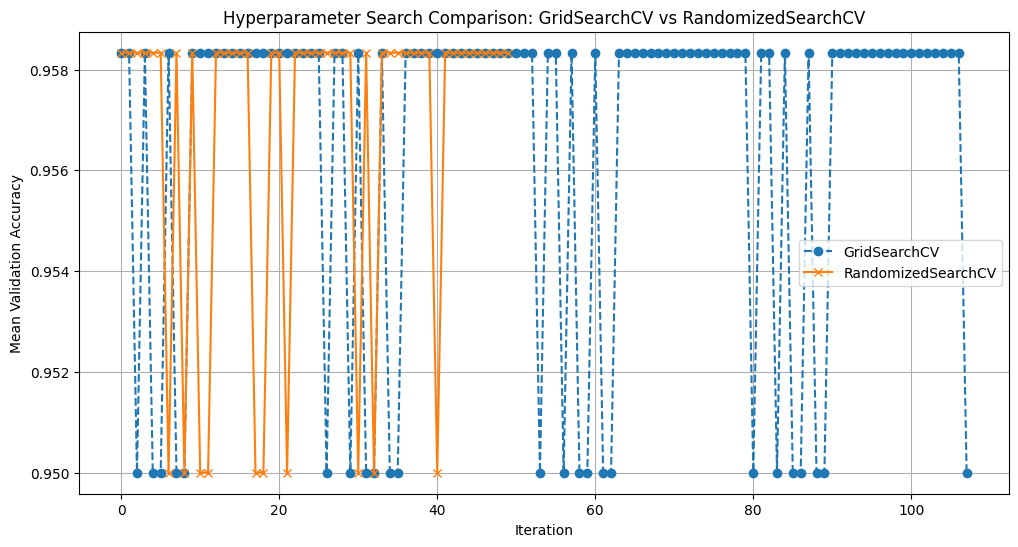

In [ ]:
import matplotlib.pyplot as plt

# Extract validation scores from GridSearchCV
grid_results = grid_search.cv_results_
grid_mean_scores = grid_results['mean_test_score']

# Extract validation scores from RandomizedSearchCV
random_results = random_search.cv_results_
random_mean_scores = random_results['mean_test_score']

# Plot comparison
plt.figure(figsize=(12, 6))

# GridSearchCV plot
plt.plot(range(len(grid_mean_scores)), grid_mean_scores, label='GridSearchCV', marker='o', linestyle='--')

# RandomizedSearchCV plot
plt.plot(range(len(random_mean_scores)), random_mean_scores, label='RandomizedSearchCV', marker='x', linestyle='-')

# Add labels, legend, and title
plt.xlabel('Iteration')
plt.ylabel('Mean Validation Accuracy')
plt.title('Hyperparameter Search Comparison: GridSearchCV vs RandomizedSearchCV')
plt.legend()
plt.grid(True)
plt.show()


**ANN**
An Artificial Neural Network (ANN) is a computational model inspired by the structure and functioning of the human brain. It is widely used in machine learning for solving complex problems such as classification, regression, pattern recognition, and more.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten


train_data = pd.read_csv('/content/drive/MyDrive/Infosys/train.csv')
fake_news_data = pd.read_csv('/content/drive/MyDrive/Infosys/BuzzFeed_fake_news_content.csv')
real_news_data = pd.read_csv('/content/drive/MyDrive/Infosys/BuzzFeed_real_news_content.csv')
news_data = pd.read_csv('/content/drive/MyDrive/Infosys/News.csv')

# Combine datasets
data = pd.concat([fake_news_data, real_news_data], ignore_index=True)
data['label'] = [0] * len(fake_news_data) + [1] * len(real_news_data)  # 0: Fake, 1: Real

# Shuffle data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Text preprocessing
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])  # Assuming `content` column contains the news text
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=200)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build ANN model
ann_model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # Embedding layer
    Flatten(),
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
ann_model.summary()

# Train the ANN
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate the ANN
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4729 - loss: 0.6942 - val_accuracy: 0.6216 - val_loss: 0.6691
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9947 - loss: 0.3198 - val_accuracy: 0.5676 - val_loss: 0.6481
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 0.1089 - val_accuracy: 0.6216 - val_loss: 0.6164
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 0.0288 - val_accuracy: 0.6486 - val_loss: 0.6027
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.6216 - val_loss: 0.5970
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6227 - loss: 0.5982
Test Loss: 0.5970, Test Accuracy: 0.6216


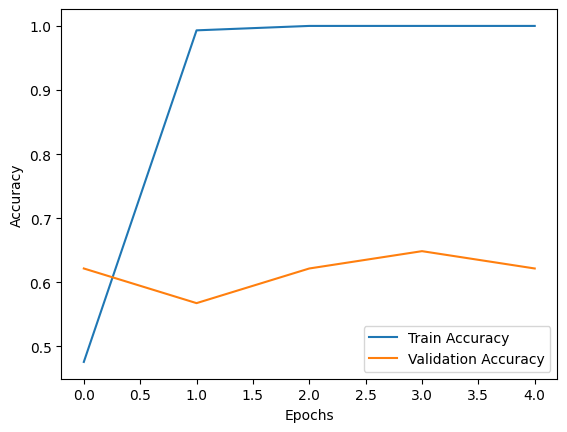

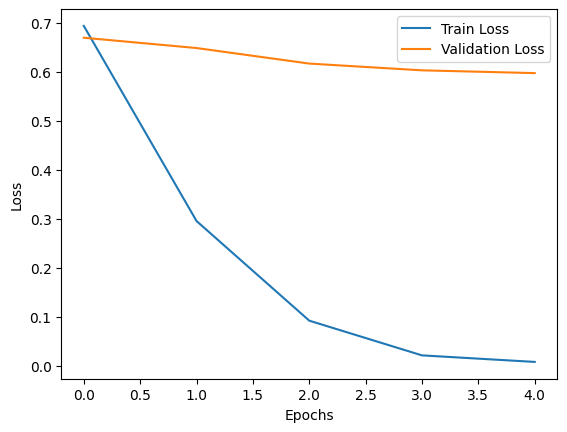

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**RNN**

A Recurrent Neural Network (RNN) is a type of neural network designed to handle sequential data by maintaining a memory of previous inputs in the sequence. Unlike traditional feedforward neural networks, RNNs have connections that form loops, allowing information to persist and enabling the network to exhibit dynamic temporal behavior.

RNNs are particularly useful for tasks where the order of the input data matters, such as time series forecasting, natural language processing (NLP), and speech recognition.



In [ ]:
pip install tensorflow nltk scikit-learn faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# Initialize Faker instance
fake = Faker()

# Function to generate fake news
def generate_fake_news(num_samples=1000):
    fake_news = []
    for _ in range(num_samples):
        title = fake.sentence(nb_words=6)
        body = fake.text(max_nb_chars=200)
        fake_news.append(f"Fake News: {title} - {body}")
    return fake_news

# Function to generate real news
def generate_real_news(num_samples=1000):
    real_news = []
    for _ in range(num_samples):
        title = fake.sentence(nb_words=6)
        body = fake.text(max_nb_chars=200)
        real_news.append(f"Real News: {title} - {body}")
    return real_news

# Generate fake and real news datasets
fake_news_data = generate_fake_news()
real_news_data = generate_real_news()

# Create a DataFrame
news_data = pd.DataFrame({
    'Content': fake_news_data + real_news_data,
    'Label': [0] * len(fake_news_data) + [1] * len(real_news_data)
})

# Show the first few rows
print(news_data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                             Content  Label
0  Fake News: Cut car sound off. - Woman them whe...      0
1  Fake News: Exist key threat oil. - Rock or par...      0
2  Fake News: Buy continue media window shoulder ...      0
3  Fake News: Rather chance Mr tell. - Maintain h...      0
4  Fake News: Make industry citizen act old call....      0


In [ ]:
# Data Preprocessing: Remove stopwords and clean the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Clean the text data
news_data['Content'] = news_data['Content'].apply(clean_text)

# Encode the labels (0=Fake, 1=Real)
label_encoder = LabelEncoder()
news_data['Label'] = label_encoder.fit_transform(news_data['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news_data['Content'], news_data['Label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert the texts into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to make them of equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Check the shape of the data
print("Train shape:", X_train_pad.shape)
print("Test shape:", X_test_pad.shape)


Train shape: (1600, 200)
Test shape: (400, 200)


In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.4936 - loss: 0.6934 - val_accuracy: 0.5675 - val_loss: 0.6916
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.7224 - loss: 0.6638 - val_accuracy: 1.0000 - val_loss: 0.2536
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.9804 - loss: 0.2083 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 1.0000 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.9994 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0055
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0055
Test accuracy: 1.0000


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the datasets


# Add a label column to the datasets
fake_news_data['Label'] = 0  # Fake news labeled as 0
real_news_data['Label'] = 1  # Real news labeled as 1

# Combine the datasets
# Use the 'text' column as the content for training, and 'Label' for classification
combined_news_data = pd.concat([fake_news_data[['text', 'Label']], real_news_data[['text', 'Label']]])

# Reset the index of the combined dataset
combined_news_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the combined dataset
#print("\nCombined Fake and Real News Data:")
#print(combined_news_data.head())

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text data
def clean_text(text):
    text = str(text).lower()  # Lowercasing
    text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the cleaning function to the 'text' column
combined_news_data['text'] = combined_news_data['text'].apply(clean_text)

# Split the data into training and testing sets
X = combined_news_data['text']
y = combined_news_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert the texts into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to make them of equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Display the shape of the data
print("\nTraining data shape:", X_train_pad.shape)
print("\nTesting data shape:", X_test_pad.shape)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout

# Define the RNN model
model = Sequential()

# Add an explicit Input layer
model.add(Input(shape=(200,)))  # 200 is the sequence length

# Add the Embedding layer (without input_shape)
model.add(Embedding(input_dim=5000, output_dim=128))  # Vocabulary size and embedding dimensions

# Add an LSTM layer
model.add(LSTM(units=64, return_sequences=False))

# Add a Dropout layer for regularization
model.add(Dropout(0.5))

# Add a Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nTest accuracy: {accuracy:.4f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Training data shape: (145, 200)

Testing data shape: (37, 200)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.4627 - loss: 0.6934 - val_accuracy: 0.4865 - val_loss: 0.6910
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8778 - loss: 0.6822 - val_accuracy: 0.6757 - val_loss: 0.6876
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9220 - loss: 0.6704 - val_accuracy: 0.6216 - val_loss: 0.6838
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9211 - loss: 0.6551 - val_accuracy: 0.6216 - val_loss: 0.6778
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.9574 - loss: 0.6261 - val_accuracy: 0.7297 - val_loss: 0.6673
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7261 - loss: 0.6665

Test accuracy: 0.7297


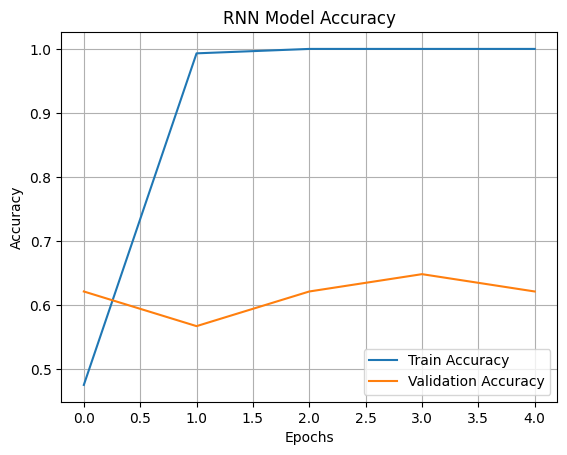

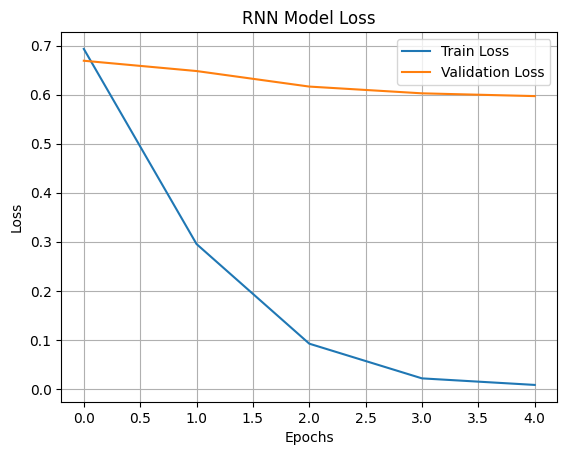

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
